In [1]:
from konlpy.tag import *
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from collections import Counter

okt = Okt() # 문장에서 명사를 골라주는 형태소 분석기
kkma = Kkma() # 문장에서 명사를 골라주는 형태소 분석기

In [4]:
print("Kkma",kkma.nouns("나는 사과, 사과, 복숭아, 복숭아가 좋아요")) # 중복단어 자동 제거
print("okt",okt.nouns("나는 사과, 사과, 복숭아, 복숭아가 좋아요"))

Kkma ['사과', '복숭아']
okt ['나', '사과', '사과', '복숭아', '복숭아']


In [21]:
data1 = open('C:\\Users\\01048\\Desktop\\crawling\\파이썬_분석예제.txt', encoding='UTF8').read()
print(data1)

나는 사과와 바나나가 제일 좋아요^^
나는 역시 복숭아와 사과가 좋아요!
나는 단감, 단감, 단감, 단감이 최고 좋아요!
나는 토마토와 오렌지를 가장 좋아하죠


In [22]:
data2 = okt.nouns(data1)
print("1.추출된 키워드:",data2)
print('\n')

data3 = Counter(data2)
print("2. 단어별 빈도수:", data3) # 한명이 단감을 네번 말했는데 모두 카운팅 됨 (데이터의 왜곡)

1.추출된 키워드: ['나', '사과', '바나나', '제일', '나', '역시', '복숭아', '사과', '나', '단감', '단감', '단감', '단감', '최고', '나', '토마토', '오렌지', '가장']


2. 단어별 빈도수: Counter({'나': 4, '단감': 4, '사과': 2, '바나나': 1, '제일': 1, '역시': 1, '복숭아': 1, '최고': 1, '토마토': 1, '오렌지': 1, '가장': 1})


In [13]:
data1 = open('C:\\Users\\01048\\Desktop\\crawling\\파이썬_분석예제.txt', encoding='UTF8').readlines()
print(data1)
print('\n')

data22 = []
for i in data1:
    data2 = kkma.nouns(i)
    for j in range(0,len(data2)):
        data22.append(data2[j])
print(data22)
data23 = Counter(data22)
print("단어별 빈도수", data23)

['나는 사과와 바나나가 제일 좋아요^^\n', '나는 역시 복숭아와 사과가 좋아요!\n', '나는 단감, 단감, 단감, 단감이 최고 좋아요!\n', '나는 토마토와 오렌지를 가장 좋아하죠']


['사과', '바나나', '나', '복숭아', '사과', '나', '단감', '최고', '나', '토마토', '오렌지']
단어별 빈도수 Counter({'나': 3, '사과': 2, '바나나': 1, '복숭아': 1, '단감': 1, '최고': 1, '토마토': 1, '오렌지': 1})


In [23]:
# 불용어 제거하기 
sword = open('C:\\Users\\01048\\Desktop\\crawling\\불용어목록.txt', encoding='UTF8').read()
print(sword)
data4 = [each_word for each_word in data2
        if each_word not in sword]
print(data4)

최고
역시
가장
제일 
나
['사과', '바나나', '복숭아', '사과', '단감', '단감', '단감', '단감', '토마토', '오렌지']


In [24]:
# 글자수로 불용어 제거하기
data5 = []
for i in data4:
    if len(i) >= 2 | len(i) <= 10:
        data5.append(i)
print(data5)

['사과', '바나나', '복숭아', '사과', '단감', '단감', '단감', '단감', '토마토', '오렌지']


In [25]:
# 단어별 빈도수 집계하기
data6 = Counter(data5)
data7 = data6.most_common(10)
print(data7)
data8 = dict(data7)

[('단감', 4), ('사과', 2), ('바나나', 1), ('복숭아', 1), ('토마토', 1), ('오렌지', 1)]


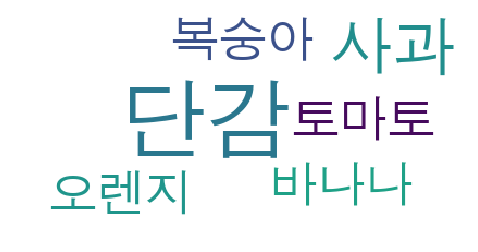

In [29]:
wordcloud = WordCloud(font_path="c:\\windows\\fonts\\HMKMG.TTF",
                     relative_scaling=0.5,
                     background_color="white").generate_from_frequencies(data8)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [30]:
!pip install nltk

  Running setup.py install for nltk: started
    Running setup.py install for nltk: finished with status 'done'


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [31]:
# 영문 텍스트는  nltk패키지
import nltk
nltk.download()

c:\users\01048\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
c:\users\01048\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
c:\users\01048\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
from nltk.corpus import brown
brown.words()

data1 = """I love apple, apple, apple, and orange but hate cherry,
I don't love mange"""

In [ ]:
data2 = nltk.word_tokenize(data1)
print(data2)

In [ ]:
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
new_data2 = tokenizer.tokenize(data1)
print(new_data2)